IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm 
import pylab as py 
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
stdscale = StandardScaler()
stdscale
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize']=(14,7)
sns.set()


<h>IMPORTING DATA<h/>

In [2]:
# df = pd.read_csv(r'C:/Users/SrutiO/Desktop/Capstone/clean_final_data.csv')
# df.iloc[:,20:]
df2 = pd.read_csv(r'C:/Users/SrutiO/Desktop/Capstone/cleaned_3_data.csv')


Index(['Unnamed: 0', 'no_phy_movies_rental', 'no_movies_purchase',
       'pref_title_type_trans', 'pref_content_rating_trans',
       'pref_genre_trans', 'no_device_grp_used', 'no_device_used',
       'pref_device_grp_trans', 'pref_device_trans', 'pref_we_wd_trans',
       'pref_dow_trans', 'pref_tod_trans', 'no_digital_movie', 'no_of_vod',
       'no_of_hd', 'no_of_sd', 'avg_days_bet_trans', 'no_of_orders',
       'prop_promo', 'prop_holiday', 'trans_group', 'od_tenure_grp',
       'platform_group', 'device_group', 'loyalty_period_grp',
       'phy_tenure_grp', 'pref_title_type', 'pref_content_rating',
       'pref_genre', 'subscriber_indicator', 'playpassoptinsource',
       'pref_device_grp', 'pref_device', 'pref_we_wd', 'pref_dow', 'pref_tod',
       'preferred_renttype', 'preferred_format', 'total_collected_promo_amt',
       'total_rev', 'avg_rev', 'customer_id'],
      dtype='object')

high no_of_orders temp1, temp2 are high order dataframe subsets

In [3]:

temp1 = df2[df2['no_of_orders']>29]
temp1.count()
temp2 = df2[df2['no_of_orders']<30]
temp2.count()

Unnamed: 0                   87202
no_phy_movies_rental         87202
no_movies_purchase           87202
pref_title_type_trans        87202
pref_content_rating_trans    87202
pref_genre_trans             87202
no_device_grp_used           87202
no_device_used               87202
pref_device_grp_trans        87202
pref_device_trans            87202
pref_we_wd_trans             87202
pref_dow_trans               87202
pref_tod_trans               87202
no_digital_movie             87202
no_of_vod                    87202
no_of_hd                     87202
no_of_sd                     87202
avg_days_bet_trans           87202
no_of_orders                 87202
prop_promo                   87202
prop_holiday                 87202
trans_group                  87202
od_tenure_grp                87202
platform_group               87202
device_group                 87202
loyalty_period_grp           87202
phy_tenure_grp               87202
pref_title_type              87202
pref_content_rating 

In [4]:
x=df2[['no_of_orders']]
y=df2[['customer_id']]

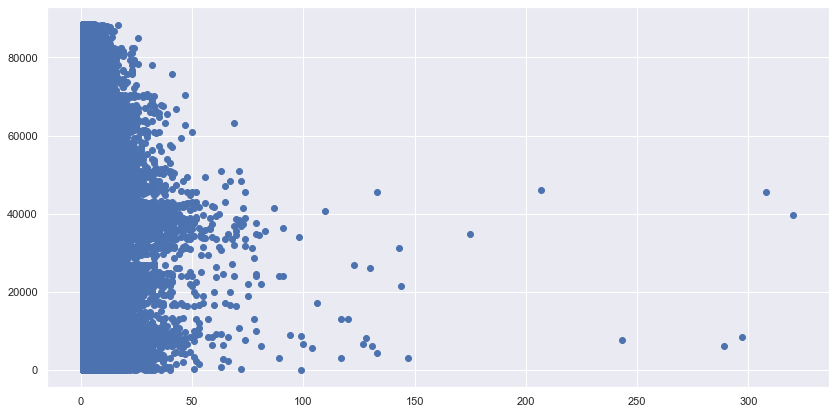

In [5]:
plt.scatter(x,y)

In [6]:
rel1 = temp1.corr()
rel1.iloc[:,10:20]

,pref_we_wd_trans,pref_dow_trans,pref_tod_trans,no_digital_movie,no_of_vod,no_of_hd,no_of_sd,avg_days_bet_trans,no_of_orders,prop_promo
Unnamed: 0,-0.019059,-0.007269,0.002998,-0.018207,0.013799,-0.000894,-0.020398,0.003488,-0.016029,-0.004238
no_phy_movies_rental,0.155718,0.099984,0.100180,0.138736,0.219543,0.044067,0.164509,-0.149279,0.169730,0.199663
no_movies_purchase,0.119365,0.093693,0.055284,0.089800,0.116518,0.023595,0.111890,-0.045029,0.108441,0.054251
pref_title_type_trans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pref_content_rating_trans,0.803294,0.682007,0.732527,0.864127,0.541863,0.631412,0.212888,-0.612949,0.850061,0.373590
pref_genre_trans,0.771521,0.627907,0.731475,0.821684,0.466573,0.588831,0.242842,-0.622073,0.825424,0.367877
no_device_grp_used,0.236345,0.185706,0.179186,0.247644,0.153416,0.270741,-0.038766,-0.228379,0.268553,0.413605
no_device_used,0.372378,0.270352,0.289728,0.350679,0.285587,0.385230,-0.031233,-0.300937,0.399767,0.521253
pref_device_grp_trans,0.891715,0.769888,0.834513,0.955648,0.451767,0.717755,0.217405,-0.631961,0.948160,0.401574
pref_device_trans,0.865075,0.763294,0.818698,0.929062,0.420288,0.680673,0.228646,-0.617703,0.915753,0.362934


In [7]:
rel2 = temp2.corr()
rel2.iloc[:,10:20]

,pref_we_wd_trans,pref_dow_trans,pref_tod_trans,no_digital_movie,no_of_vod,no_of_hd,no_of_sd,avg_days_bet_trans,no_of_orders,prop_promo
Unnamed: 0,-0.023158,-0.016430,-0.021761,-0.024483,-0.023482,-0.013656,-0.019605,0.009211,-0.024610,0.018184
no_phy_movies_rental,-0.040571,-0.031493,-0.041553,-0.027434,-0.026192,-0.036446,-0.005040,-0.001726,-0.026965,0.168509
no_movies_purchase,-0.002792,-0.001094,-0.005941,0.000035,-0.003942,-0.005646,0.004369,-0.006091,0.000040,0.039847
pref_title_type_trans,0.008654,0.006908,0.004403,0.008022,0.008571,0.001766,0.008430,-0.003934,0.008010,-0.001199
pref_content_rating_trans,0.752538,0.590773,0.734658,0.815369,0.804533,0.471675,0.634352,-0.322959,0.814995,-0.079907
pref_genre_trans,0.753017,0.598020,0.738858,0.815456,0.798498,0.477774,0.631374,-0.348265,0.816378,-0.082183
no_device_grp_used,0.195933,0.138798,0.166174,0.225062,0.216111,0.128750,0.176374,-0.039500,0.225100,0.017676
no_device_used,0.229457,0.162359,0.198565,0.261464,0.251236,0.158372,0.198333,-0.045590,0.261642,0.008940
pref_device_grp_trans,0.901608,0.699438,0.884943,0.979475,0.964262,0.566417,0.763293,-0.364538,0.979944,-0.119158
pref_device_trans,0.895861,0.696097,0.880438,0.972899,0.958260,0.560058,0.760047,-0.365091,0.973302,-0.118660


High correlation values >0.6

In [8]:
hrel1={}
for i in rel1:
    for j in rel1:
        if (rel1[i][j]>0.6 and rel1[i][j]< 1 ) or (rel1[i][j]< -0.6  and  rel1[i][j] >-1 ):
            hrel1.update({i:j})

In [9]:
hrel1

{'pref_content_rating_trans': 'total_collected_promo_amt',
 'pref_genre_trans': 'total_collected_promo_amt',
 'no_device_grp_used': 'device_group',
 'no_device_used': 'device_group',
 'pref_device_grp_trans': 'total_collected_promo_amt',
 'pref_device_trans': 'total_collected_promo_amt',
 'pref_we_wd_trans': 'total_collected_promo_amt',
 'pref_dow_trans': 'total_collected_promo_amt',
 'pref_tod_trans': 'total_collected_promo_amt',
 'no_digital_movie': 'total_collected_promo_amt',
 'no_of_hd': 'total_collected_promo_amt',
 'no_of_sd': 'preferred_format',
 'avg_days_bet_trans': 'no_of_orders',
 'no_of_orders': 'total_collected_promo_amt',
 'prop_promo': 'total_collected_promo_amt',
 'platform_group': 'device_group',
 'device_group': 'platform_group',
 'pref_device_grp': 'pref_device',
 'pref_device': 'pref_device_grp',
 'preferred_format': 'no_of_sd',
 'total_collected_promo_amt': 'prop_promo',
 'total_rev': 'avg_rev',
 'avg_rev': 'total_rev'}

Plotting the high correlation 

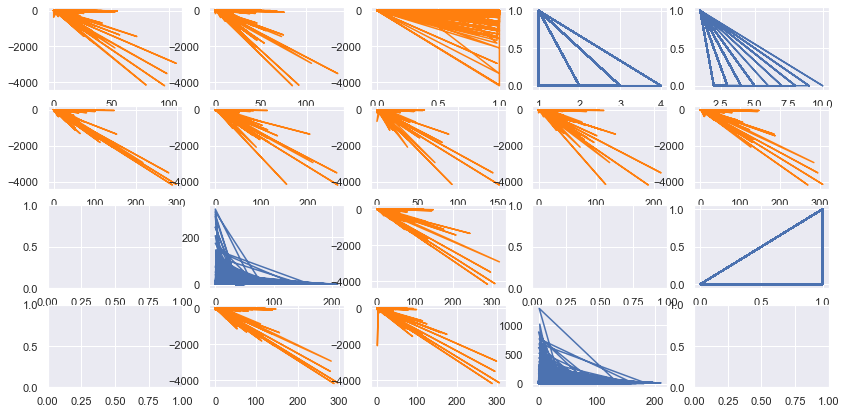

In [10]:
fig, axs = plt.subplots(4,5) 
axs[0, 0].plot(df2.pref_content_rating_trans, df2.total_collected_promo_amt,'tab:orange')
# axs[0, 0].set_title('rating Vs promo amt')
axs[0, 1].plot(df2.pref_genre_trans,df2.total_collected_promo_amt,'tab:orange')
# axs[0, 1].set_title('pref genre trans Vs promo amt')
axs[0, 2].plot(df2.prop_promo, df2.total_collected_promo_amt,'tab:orange')
# axs[0, 2].set_title('promo trans vs promo amt')
axs[0,3].plot(df2.no_device_grp_used,df2.device_group,)
# axs[0, 3].set_title('num device grp vs device grp')
axs[0,4].plot(df2.no_device_used,df2.device_group)
# axs[0, 4].set_title('num device grp vs device grp')
axs[1,0].plot(df2.pref_device_trans,df2.total_collected_promo_amt,'tab:orange')
# axs[1,0].set_title('pref device trans vs promo amt')
axs[1,1].plot(df2.pref_we_wd_trans,df2.total_collected_promo_amt,'tab:orange')
axs[1,2].plot(df2.pref_dow_trans,df2.total_collected_promo_amt,'tab:orange')
axs[1,3].plot(df2.pref_tod_trans,df2.total_collected_promo_amt,'tab:orange')
axs[1,4].plot(df2.no_digital_movie,df2.total_collected_promo_amt,'tab:orange')
# axs[2,0].plot(df2.no_of_sd,df2.preferred_format)
axs[2,1].plot(df2.avg_days_bet_trans,df2.no_of_orders)
axs[2,2].plot(df2.no_of_orders,df2.total_collected_promo_amt,'tab:orange')
# axs[2,3].plot(df2.prop_promo,df2.total_collected_promo_amt)
axs[2,4].plot(df2.platform_group,df2.device_group)
# axs[3,0].plot(df2.total_rev,df2.avg_rev)
axs[3,1].plot(df2.pref_device_grp_trans,df2.total_collected_promo_amt,'tab:orange')
axs[3,2].plot(df2.no_of_hd,df2.total_collected_promo_amt,'tab:orange')
axs[3,3].plot(df2.avg_days_bet_trans,df2.total_rev)
# axs[3,4].plot(df2.pref_device_grp,df2.pref_device)




<b>Percentile </b>

In [11]:
order_per=np.percentile(df2.no_of_orders,[25,50,75,85,95,99])
trev_per=np.percentile(df2.total_rev,[25,50,75,85,95,99])
promorev_per=np.percentile(df2.total_collected_promo_amt,[25,50,75,85,95,99])
pdevg_per=np.percentile(df2.pref_device_grp_trans,[25,50,75,85,95,99])
pdev_per=np.percentile(df2.pref_device_trans,[25,50,75,85,95,99])
no_hd_per=np.percentile(df2.no_of_hd,[25,50,75,85,95,99])
no_sd_per=np.percentile(df2.no_of_sd,[25,50,75,85,95,99])
cont_rat_trans_per=np.percentile(df2.pref_content_rating_trans,[25,50,75,85,95,99])
no_digimov_per=np.percentile(df2.no_digital_movie,[25,50,75,85,95,99])
avg_bw_trans_days_per=np.percentile(df2.avg_days_bet_trans,[25,50,75,85,95,99])



In [12]:
no_digimov_per


array([ 1.,  2.,  4.,  8., 16., 29.])

In [13]:
cont_rat_trans_per

array([ 1.,  1.,  2.,  4.,  7., 13.])

In [14]:
trev_per

array([  4.99  ,   9.98  ,  21.95  ,  35.96  ,  79.84  , 150.6453])

In [15]:
promorev_per

array([-2.,  0.,  0.,  0.,  0.,  0.])

In [16]:
df2.total_collected_promo_amt.describe()

count    88048.000000
mean        -2.207333
std         32.531180
min      -4190.120000
25%         -2.000000
50%          0.000000
75%          0.000000
max          0.000000
Name: total_collected_promo_amt, dtype: float64

In [17]:
pdev_per

array([ 1.,  2.,  4.,  7., 15., 27.])

In [18]:
pdevg_per

array([ 1.,  2.,  4.,  7., 15., 28.])

In [19]:
no_hd_per

array([ 0.,  1.,  2.,  3.,  7., 18.])

In [20]:
no_sd_per

array([ 0.,  1.,  3.,  4., 12., 23.])

In [21]:
df2.preferred_format.describe()

count    88048.000000
mean         1.197529
std          0.948948
min          0.000000
25%          0.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: preferred_format, dtype: float64

In [22]:
order_per

array([ 1.,  2.,  4.,  8., 16., 29.])

Rows to delete , df2 is the new cleaned dataframe

In [23]:
# cleaned_2 dataset 
# c1=df[['total_rev','total_collected_promo_amt','no_of_orders','customer_id']].query('(total_rev==0) and (total_collected_promo_amt== 0) and (no_of_orders > 0)')
# cond = df['customer_id'].isin(c1['customer_id'])
# df.drop(df[cond].index, inplace = True)
# df2=df[~df.isin(c1)].dropna() # here df2 id 88526-478 rows
# df2.to_csv('C:/Users/SrutiO/Desktop/Capstone/cleaned_3_data.csv',sep=',', header=True)

<h><b>HYPOTHESIS TESTING</b></h>
1. high tenure days cust with high frequency are enrolled into longer loyalty period 
2. low avg_days_bw_trans cust with higher orders have higher loyalty period
3.(M)Customers with high avg revenue watch movies largely on HD


In [24]:
hyp2=df2[['avg_days_bet_trans','loyalty_period_grp','no_of_orders','customer_id']].query('avg_days_bet_trans <18  ').count()
hyp2[['loyalty_period_grp']].mode()

0    21960
dtype: int64

In [25]:
hyp3 = df2[['trans_group','no_phy_movies_rental']].groupby(by='trans_group').count().reset_index()
hyp3

,trans_group,no_phy_movies_rental
0,0,54925
1,1,33123


In [26]:
hyp4= df2[['trans_group','prop_promo']].count().reset_index()

6


Text(0, 0.5, 'Np. of orders')

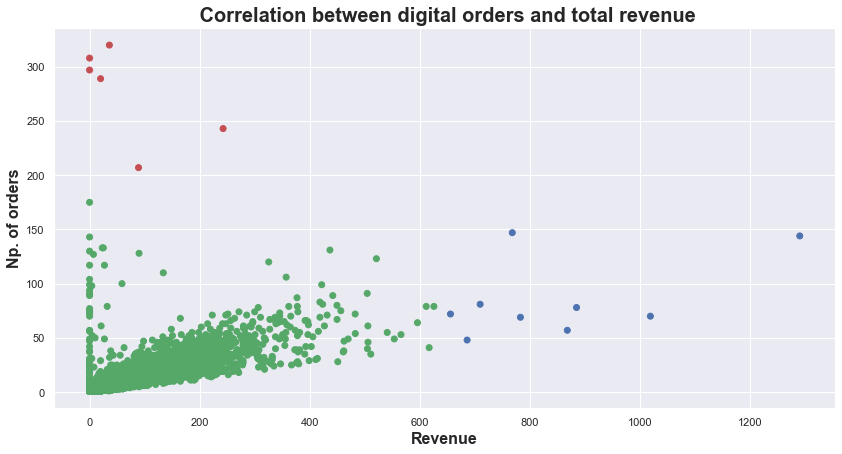

In [27]:
#hypdoc-20 : high no_of_orders should have overall high t_rev 
x=df2.total_rev
y=df2.no_of_orders
hypdoc_20= np.where((x<max(x)*0.5) &(y>200),'r',np.where(((y < max(y)*0.5)& (x >max(x)*0.5)),'b','g'))
fig=plt.scatter(x,y,c=hypdoc_20)
print(len([i for i in hypdoc_20 if i =='r']))
plt.title(' Correlation between digital orders and total revenue' ,fontweight="bold",size= 20)
plt.xlabel('Revenue',fontweight="bold",size= 16)
plt.ylabel('Np. of orders',fontweight="bold",size= 16)


values with no transactions in pref genre but > 0 orders : 21082


Text(0.5, 0, 'no. of orders')

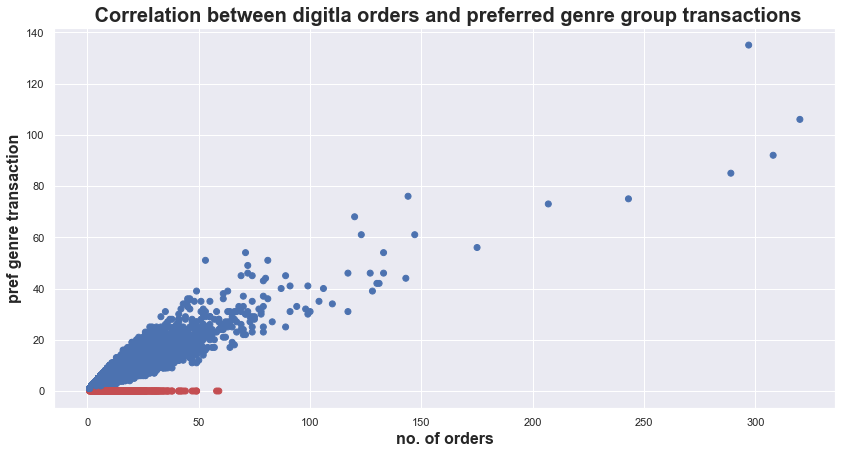

In [28]:
# hypdoc_19 : high no_of_orders should have overall high trans in pref genre group 
y=df2.pref_genre_trans
x=df2.no_of_orders
hypdoc_19 = np.where(y==0,'r','b')
custid_25= df2[['customer_id','prop_promo','od_tenure_grp']].query(' prop_promo> 0.5')
print('values with no transactions in pref genre but > 0 orders :',len([i for i in hypdoc_19 if i =='r']))
fig=plt.scatter(x,y,c=hypdoc_19)
plt.title(' Correlation between digitla orders and preferred genre group transactions' ,fontweight="bold",size= 20)
plt.ylabel('pref genre transaction',fontweight="bold",size= 16)
plt.xlabel('no. of orders',fontweight="bold",size= 16)


       customer_id  prop_promo  od_tenure_grp
24         49093.0         1.0              1
43         16920.0         1.0              2
52         30565.0         1.0              0
107        30605.0         1.0              3
118        48823.0         1.0              2
...            ...         ...            ...
88021      88458.0         1.0              3
88029      86857.0         1.0              2
88038      87015.0         1.0              0
88044      88445.0         1.0              2
88045      86650.0         1.0              2

[9114 rows x 3 columns]
0    36252
2    28843
1    19253
3     3700
Name: od_tenure_grp, dtype: int64


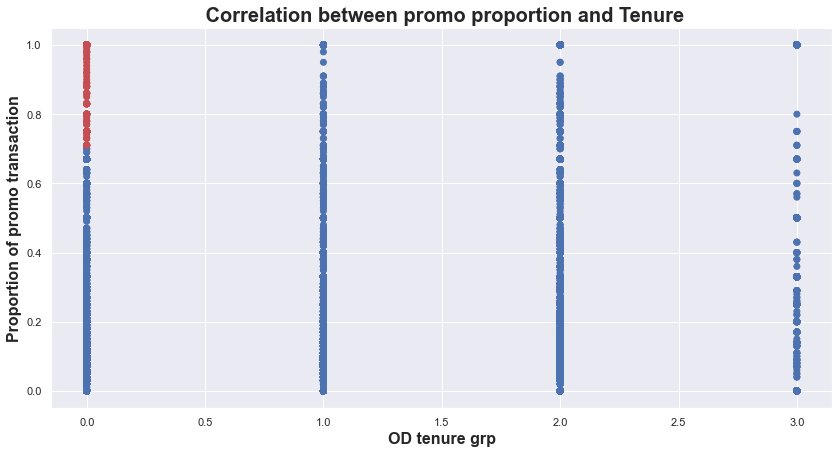

In [29]:
# hypdoc_25 : high promo_trans cust have low tenure

y=df2.prop_promo
x=df2.od_tenure_grp
cc=0.7*max(df2.prop_promo)
custid_25= df2[['customer_id','prop_promo','od_tenure_grp']].query(' prop_promo==1 ')
hypdoc_25 = np.where((x==0)&(y> 0.7*max(y)),'r','b')
# print(len([i for i in hypdoc_25 if i =='r']))
print(custid_25)
fig=plt.scatter(x,y,c=hypdoc_25)
plt.title(' Correlation between promo proportion and Tenure' ,fontweight="bold",size= 20)
plt.ylabel('Proportion of promo transaction',fontweight="bold",size= 16)
plt.xlabel('OD tenure grp',fontweight="bold",size= 16)
print(df2.od_tenure_grp.value_counts())


172


Text(0.5, 0, 'Average days between transaction')

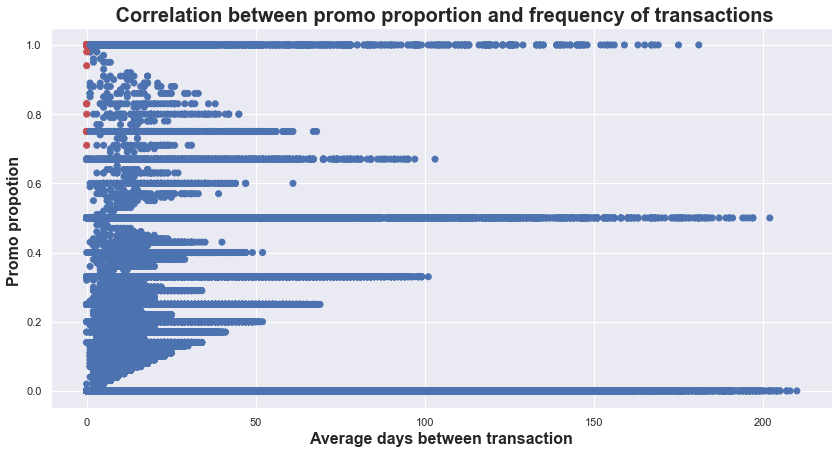

In [30]:
# hypdoc_41 : high promo_trans cust have high avg_days_bw_trans

y=df2.prop_promo
x=df2.avg_days_bet_trans
hypdoc_41 = np.where((x==0)&(y> 0.7*max(y)),'r','b')
print(len([i for i in hypdoc_41 if i =='r']))
fig=plt.scatter(x,y,c=hypdoc_41)
plt.title(' Correlation between promo proportion and frequency of transactions' ,fontweight="bold",size= 20)
plt.ylabel('Promo propotion ',fontweight="bold",size= 16)
plt.xlabel('Average days between transaction',fontweight="bold",size= 16)

5


Text(0.5, 0, 'Average days between transaction')

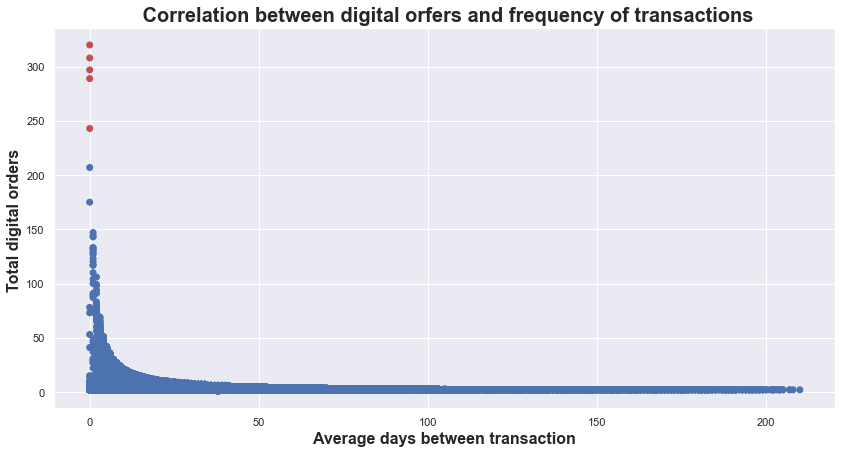

In [31]:
# hypdoc_44 : high promo_trans cust have high avg_days_bw_trans

y=df2.no_of_orders
x=df2.avg_days_bet_trans
hypdoc_44 = np.where((x==0)&(y> 0.7*max(y)),'r','b')
print(len([i for i in hypdoc_44 if i =='r']))
fig=plt.scatter(x,y,c=hypdoc_44)
plt.title(' Correlation between digital orfers and frequency of transactions' ,fontweight="bold",size= 20)
plt.ylabel('Total digital orders ',fontweight="bold",size= 16)
plt.xlabel('Average days between transaction',fontweight="bold",size= 16)

In [32]:
# plt.scatter(df2.no_promo_transactions,df2.total_collected_promo_amt)
# df2.drop('no_promo_transactions',axis=1,inplace= True)
df2

,Unnamed: 0,no_phy_movies_rental,no_movies_purchase,pref_title_type_trans,pref_content_rating_trans,pref_genre_trans,no_device_grp_used,no_device_used,pref_device_grp_trans,pref_device_trans,...,pref_device,pref_we_wd,pref_dow,pref_tod,preferred_renttype,preferred_format,total_collected_promo_amt,total_rev,avg_rev,customer_id
0,0,7,0,3,0,3,1,1,6,6,...,10,2,3,4,2,0,-3.0,28.94,4.82,8179.0
1,1,2,0,10,9,8,2,2,11,11,...,10,2,3,1,2,2,-10.0,60.84,3.80,8259.0
2,2,0,0,5,3,0,2,2,5,5,...,9,2,4,1,2,2,-2.0,24.94,4.16,8339.0
3,3,13,0,3,0,2,2,2,2,2,...,9,2,2,1,2,2,0.0,14.97,4.99,19279.0
4,4,0,0,2,1,2,2,2,0,0,...,8,2,3,4,1,0,0.0,26.98,13.49,19359.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88043,88521,0,0,1,1,0,1,1,2,2,...,10,0,2,1,2,0,0.0,11.98,5.99,86728.0
88044,88522,12,0,1,1,1,1,1,1,1,...,9,2,4,0,2,0,-2.0,2.99,2.99,88445.0
88045,88523,14,0,1,1,1,1,1,1,1,...,3,2,4,1,2,2,-2.0,2.99,2.99,86650.0
88046,88524,3,0,1,1,1,1,1,1,1,...,10,2,0,1,2,2,0.0,4.99,4.99,86730.0


In [33]:
# insight-3
c3 = df2[['customer_id','no_of_hd','no_of_sd']].query('no_of_hd==no_of_sd')
c4 = df2[['customer_id','preferred_format']].query('preferred_format==1')
res= c3[['customer_id']].isin(c4[['customer_id']])
res['customer_id'].value_counts()

True    5326
Name: customer_id, dtype: int64

NORMALITY TESTING

In [34]:

obs = df2.total_rev
# obs = np.log(df2[['total_rev']].query('total_rev >0'))
z= (obs-np.mean(obs))/np.std(obs)

obs

0        28.94
1        60.84
2        24.94
3        14.97
4        26.98
         ...  
88043    11.98
88044     2.99
88045     2.99
88046     4.99
88047    19.96
Name: total_rev, Length: 88048, dtype: float64

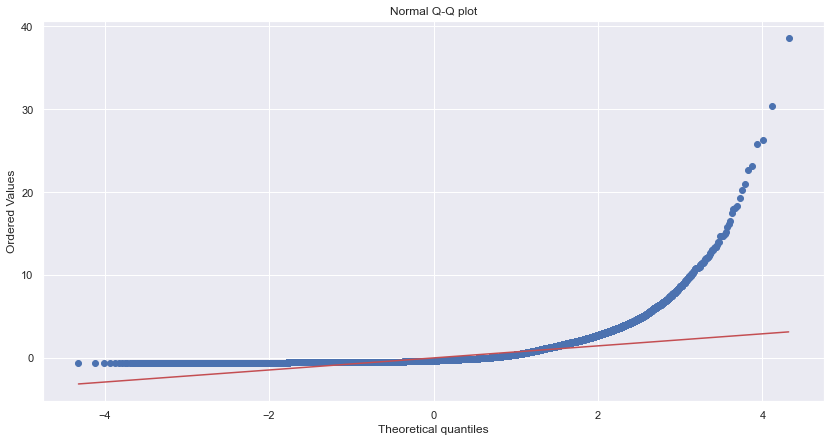

In [35]:
# QQ plot 1
stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()


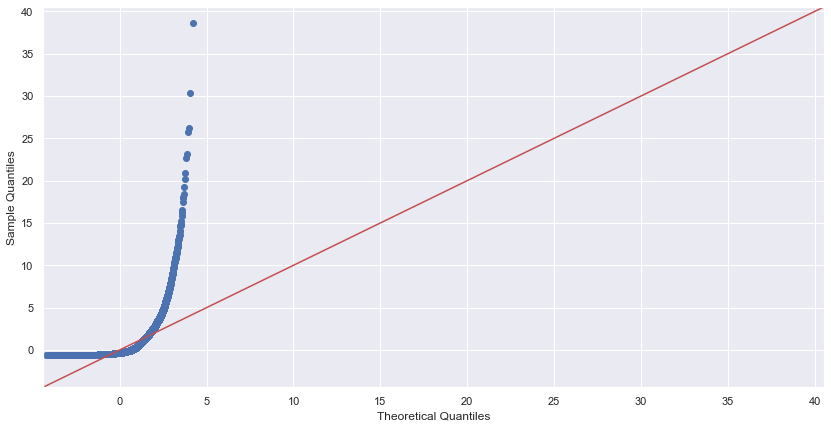

In [36]:
sm.qqplot(z, line ='45') 
py.show()

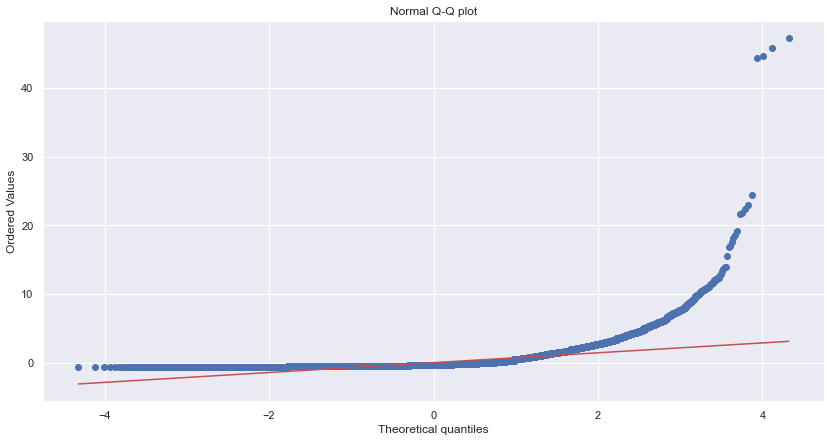

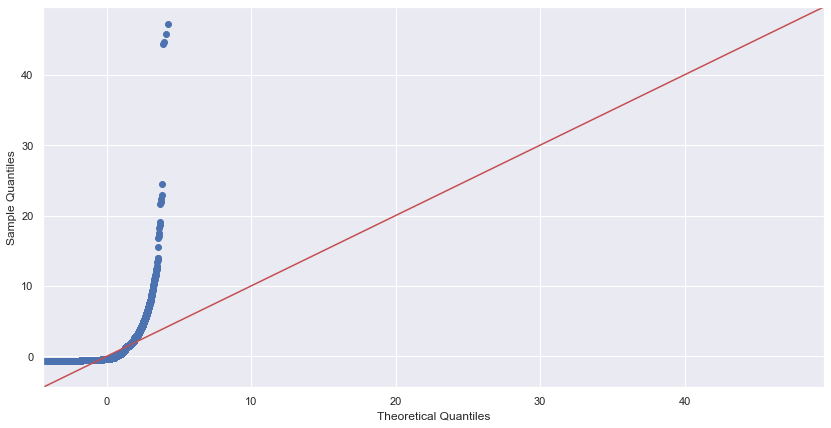

In [37]:
# QQ plot 2
obs2 = df2.pref_device_grp_trans
z2= (obs2-np.mean(obs2))/np.std(obs2)
stats.probplot(z2, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
sm.qqplot(z2, line ='45') 
py.show()
plt.show()

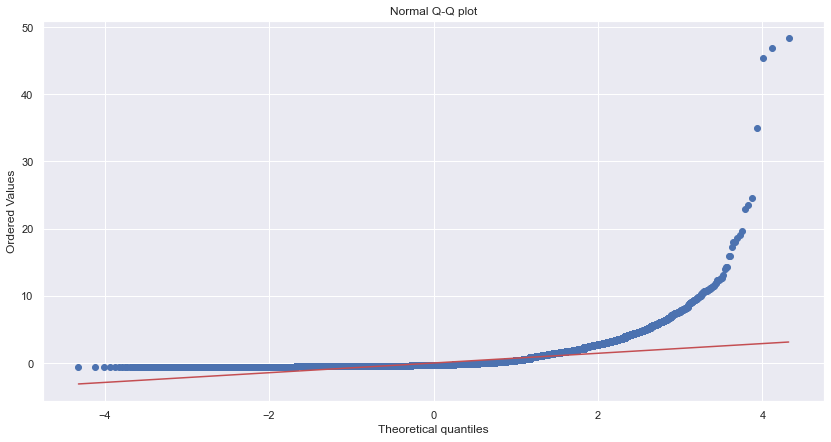

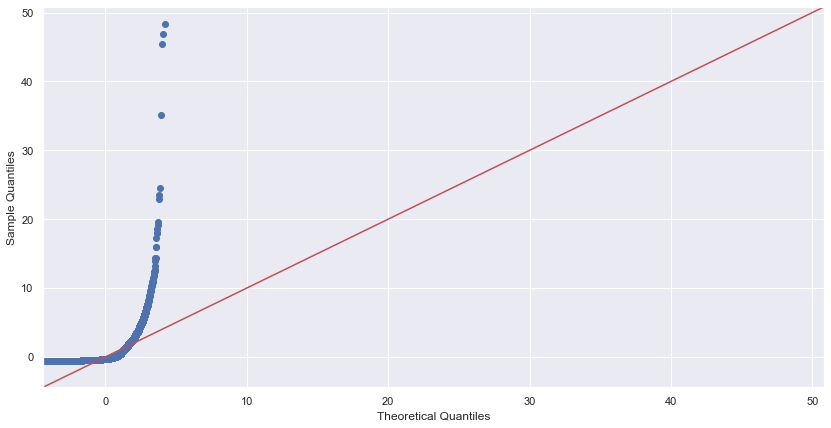

In [38]:
# QQ plot  3
obs3= df2.pref_device_trans
z3= (obs3-np.mean(obs3))/np.std(obs3)
stats.probplot(z3, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
sm.qqplot(z3, line ='45') 
py.show()
plt.show()

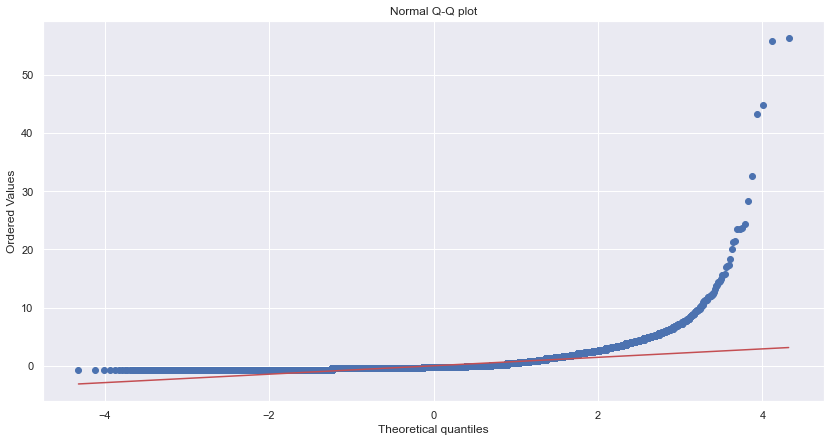

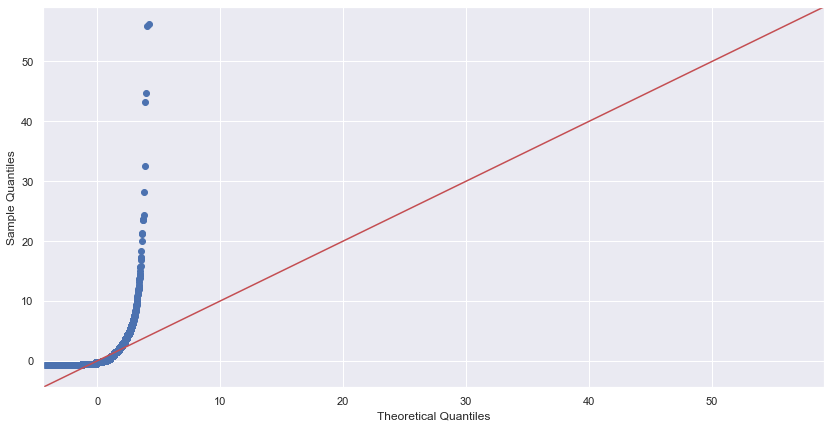

In [39]:
# QQ plot 4
obs4 = df2.pref_we_wd_trans
z4= (obs4-np.mean(obs4))/np.std(obs4)
stats.probplot(z4, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
sm.qqplot(z4, line ='45') 
py.show()
plt.show()

In [40]:
df2

,Unnamed: 0,no_phy_movies_rental,no_movies_purchase,pref_title_type_trans,pref_content_rating_trans,pref_genre_trans,no_device_grp_used,no_device_used,pref_device_grp_trans,pref_device_trans,...,pref_device,pref_we_wd,pref_dow,pref_tod,preferred_renttype,preferred_format,total_collected_promo_amt,total_rev,avg_rev,customer_id
0,0,7,0,3,0,3,1,1,6,6,...,10,2,3,4,2,0,-3.0,28.94,4.82,8179.0
1,1,2,0,10,9,8,2,2,11,11,...,10,2,3,1,2,2,-10.0,60.84,3.80,8259.0
2,2,0,0,5,3,0,2,2,5,5,...,9,2,4,1,2,2,-2.0,24.94,4.16,8339.0
3,3,13,0,3,0,2,2,2,2,2,...,9,2,2,1,2,2,0.0,14.97,4.99,19279.0
4,4,0,0,2,1,2,2,2,0,0,...,8,2,3,4,1,0,0.0,26.98,13.49,19359.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88043,88521,0,0,1,1,0,1,1,2,2,...,10,0,2,1,2,0,0.0,11.98,5.99,86728.0
88044,88522,12,0,1,1,1,1,1,1,1,...,9,2,4,0,2,0,-2.0,2.99,2.99,88445.0
88045,88523,14,0,1,1,1,1,1,1,1,...,3,2,4,1,2,2,-2.0,2.99,2.99,86650.0
88046,88524,3,0,1,1,1,1,1,1,1,...,10,2,0,1,2,2,0.0,4.99,4.99,86730.0


In [41]:
# fig, axs = plt.subplots(ncols=2)
# sns.boxplot(data=df2, x="pref_genre_trans", y="total_rev", hue=df2.pref_genre_trans.tolist(), ax=axs[0])
# sns.boxplot(data=df2, x="pref_genre_trans", y="total_collected_promo_amt", hue=df2.pref_genre_trans.tolist(), ax=axs[1])
# plt.show()

# *******_____________________________________MANOVA ______________________________________________********

from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('total_collected_promo_amt + total_rev + no_of_orders ~ total_collected_promo_amt', data=df2)
print(fit.mv_test())

                                   Multivariate linear model
                                                                                                
------------------------------------------------------------------------------------------------------
             Intercept              Value        Num DF         Den DF          F Value         Pr > F
------------------------------------------------------------------------------------------------------
                Wilks' lambda       0.6679       3.0000       88044.0000       14593.2321       0.0000
               Pillai's trace       0.3321       3.0000       88044.0000       14593.2321       0.0000
       Hotelling-Lawley trace       0.4972       3.0000       88044.0000       14593.2321       0.0000
          Roy's greatest root       0.4972       3.0000       88044.0000       14593.2321       0.0000
------------------------------------------------------------------------------------------------
                        

<b>segmented files </b>

In [42]:
# df_format = df2[['customer_id','no_of_hd',"no_of_sd",'no_digital_movie','preferred_format','preferred_renttype']]
# df_format.to_csv('C:/Users/SrutiO/Desktop/Capstone/format_seg.csv',sep=',', header=True)

In [43]:
# df_time = df2[['customer_id','pref_we_wd_trans','pref_dow_trans','pref_tod_trans','prop_holiday','pref_we_wd','pref_dow','pref_tod']]
# df_time.to_csv('C:/Users/SrutiO/Desktop/Capstone/time_seg.csv',sep=',', header=True)

In [44]:
# df_device = df2[['customer_id','no_device_grp_used','no_device_used','pref_device_grp_trans','pref_device_trans','pref_device_grp','pref_device','platform_group','device_group']]
# df_device.to_csv('C:/Users/SrutiO/Desktop/Capstone/device_seg.csv',sep=',', header=True)

In [45]:
# df_promo = df2[['customer_id','no_promo_transactions','no_of_vod','no_of_hd','no_of_sd','no_of_orders','prop_promo','od_tenure_grp','total_rev','avg_rev','total_collected_promo_amt']]
# df_promo.to_csv('C:/Users/SrutiO/Desktop/Capstone/promo_seg.csv',sep=',', header=True)

EDA


In [46]:
# checking duplicated values
dubvals = df2.duplicated()
print(dubvals.sum())
df2[dubvals]
# None in cleaned dataset

0


,Unnamed: 0,no_phy_movies_rental,no_movies_purchase,pref_title_type_trans,pref_content_rating_trans,pref_genre_trans,no_device_grp_used,no_device_used,pref_device_grp_trans,pref_device_trans,...,pref_device,pref_we_wd,pref_dow,pref_tod,preferred_renttype,preferred_format,total_collected_promo_amt,total_rev,avg_rev,customer_id


In [47]:
# quintiles of a dataframe
pd.DataFrame.quantile(df2,q= 0.8,axis=0)

Unnamed: 0                   70823.60
no_phy_movies_rental            11.00
no_movies_purchase               0.00
pref_title_type_trans            1.00
pref_content_rating_trans        3.00
pref_genre_trans                 3.00
no_device_grp_used               1.00
no_device_used                   1.00
pref_device_grp_trans            5.00
pref_device_trans                5.00
pref_we_wd_trans                 4.00
pref_dow_trans                   3.00
pref_tod_trans                   4.00
no_digital_movie                 6.00
no_of_vod                        5.00
no_of_hd                         2.00
no_of_sd                         3.00
avg_days_bet_trans              48.00
no_of_orders                     6.00
prop_promo                       0.33
prop_holiday                     0.00
trans_group                      1.00
od_tenure_grp                    2.00
platform_group                   1.00
device_group                     1.00
loyalty_period_grp               4.00
phy_tenure_g

In [48]:
# outlier treatement 
# def outlier_treat(inpcol):
#     sorted(inpcol)
#     q1,q2 =inpcol.quantile([0.25,0.75])
#     iqr=q2-q1
#     low =q1 -(1.5*iqr)
#     high =q2 + (1.5*iqr)
#     return low,high
    
# temp3 = np.where(df2[['total_rev']]>highval,highval,df2[['total_rev']])
# temp3  = np.where(df2[['total_rev']]<lowval,lowval,df2[['total_rev']])
# temp3 =stdscale.fit_transform(df2[['total_rev']]) # standradization 
# lowval,highval = outlier_treat(temp3['total_rev'])

# df2.boxplot(column=[['total_rev']])
# plt.show
# print(temp3.mean())

In [49]:
df2.columns

Index(['Unnamed: 0', 'no_phy_movies_rental', 'no_movies_purchase',
       'pref_title_type_trans', 'pref_content_rating_trans',
       'pref_genre_trans', 'no_device_grp_used', 'no_device_used',
       'pref_device_grp_trans', 'pref_device_trans', 'pref_we_wd_trans',
       'pref_dow_trans', 'pref_tod_trans', 'no_digital_movie', 'no_of_vod',
       'no_of_hd', 'no_of_sd', 'avg_days_bet_trans', 'no_of_orders',
       'prop_promo', 'prop_holiday', 'trans_group', 'od_tenure_grp',
       'platform_group', 'device_group', 'loyalty_period_grp',
       'phy_tenure_grp', 'pref_title_type', 'pref_content_rating',
       'pref_genre', 'subscriber_indicator', 'playpassoptinsource',
       'pref_device_grp', 'pref_device', 'pref_we_wd', 'pref_dow', 'pref_tod',
       'preferred_renttype', 'preferred_format', 'total_collected_promo_amt',
       'total_rev', 'avg_rev', 'customer_id'],
      dtype='object')

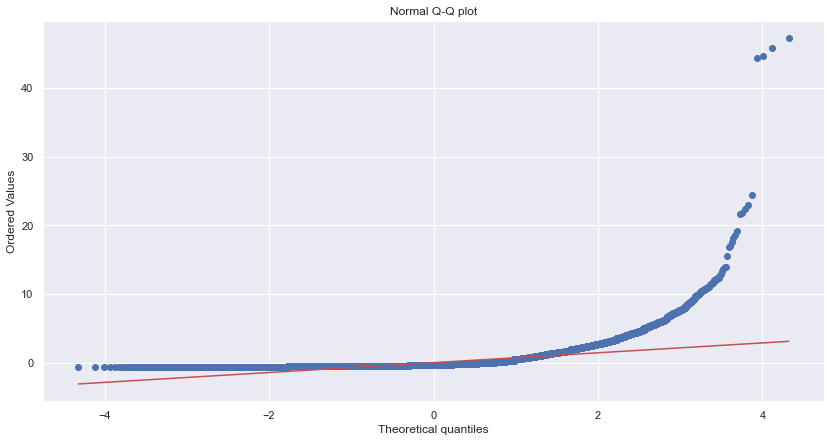

In [50]:
# QQ plot 
obs2 = df2.pref_device_grp_trans
z2= (obs2-np.mean(obs2))/np.std(obs2)
stats.probplot(z2, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [51]:
df2_rev1 = df2[['pref_genre','no_of_orders','pref_tod_trans','pref_we_wd_trans','pref_device_trans','pref_device_grp_trans']].groupby('pref_genre').sum()
df2_rev1.index = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13']
df2_percent = df2_rev1.div(df2_rev1.sum(axis=1), axis=0) * 100

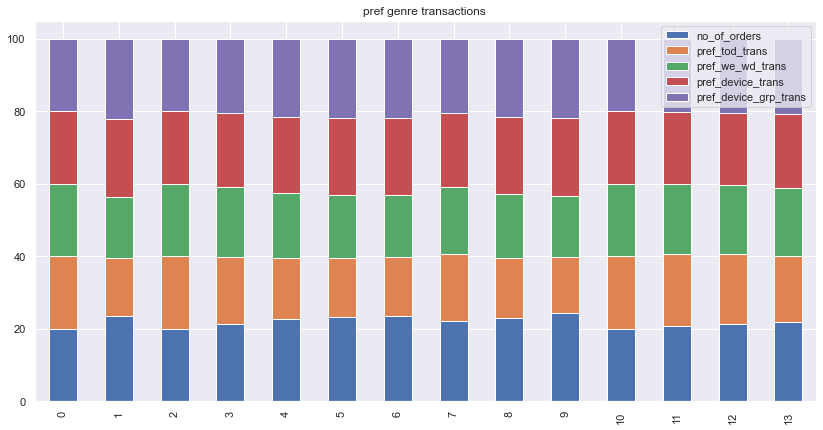

In [52]:
#  stacked plot based on pref genre
df2_percent.plot.bar(stacked = True, title = 'pref genre transactions ', grid = True)

In [53]:
# trev_per=np.percentile(df2.total_rev,[25,50,75,85,95,99])
# array([  4.99  ,   9.98  ,  21.95  ,  35.96  ,  79.84  , 150.6453])
df2_1 = df2.copy() # copy of original 
rev_category = np.where(df2['total_rev'] >=150.6453 , 1, np.where(df2['total_rev'] >=79.84 ,2,np.where(df2['total_rev'] >=35.96 ,3,np.where(df2['total_rev'] >= 21.95,4, np.where(df2['total_rev'] >=9.98 ,5,6)))))
rev_category= pd.DataFrame(rev_category)
rev_category['customer_id'] = df2_1['customer_id']
rev_category.set_axis(['rev_category','customer_id'],axis=1,inplace=True)
rev_category

,rev_category,customer_id
0,4,8179.0
1,3,8259.0
2,4,8339.0
3,5,19279.0
4,4,19359.0
...,...,...
88043,5,86728.0
88044,6,88445.0
88045,6,86650.0
88046,6,86730.0


In [54]:
#  merging the revue categories to the  copy og original , df2_2 = revenue category merger version 
df2_2=pd.merge(df2_1,rev_category, on= 'customer_id')
df2_2.iloc[:,24:]

,device_group,loyalty_period_grp,phy_tenure_grp,pref_title_type,pref_content_rating,pref_genre,subscriber_indicator,playpassoptinsource,pref_device_grp,pref_device,pref_we_wd,pref_dow,pref_tod,preferred_renttype,preferred_format,total_collected_promo_amt,total_rev,avg_rev,customer_id,rev_category
0,1,0,2,0,3,4,1,3,1,10,2,3,4,2,0,-3.0,28.94,4.82,8179.0,4
1,0,4,4,0,1,5,1,7,1,10,2,3,1,2,2,-10.0,60.84,3.80,8259.0,3
2,0,0,4,0,2,8,1,6,1,9,2,4,1,2,2,-2.0,24.94,4.16,8339.0,4
3,0,1,4,0,3,0,1,7,1,9,2,2,1,2,2,0.0,14.97,4.99,19279.0,5
4,0,0,4,1,0,5,1,6,3,8,2,3,4,1,0,0.0,26.98,13.49,19359.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88043,1,4,4,0,1,8,1,7,1,10,0,2,1,2,0,0.0,11.98,5.99,86728.0,5
88044,1,2,4,0,0,0,1,7,1,9,2,4,0,2,0,-2.0,2.99,2.99,88445.0,6
88045,1,4,4,0,1,0,1,7,2,3,2,4,1,2,2,-2.0,2.99,2.99,86650.0,6
88046,1,3,5,0,0,0,1,5,1,10,2,0,1,2,2,0.0,4.99,4.99,86730.0,6


In [71]:
# grouping based on revenue category
df2_2_rev2=df2_2[['rev_category','pref_title_type_trans','pref_content_rating_trans','pref_genre_trans','pref_device_grp_trans','pref_device_trans','pref_we_wd_trans','pref_tod_trans']].groupby('rev_category').sum()
df2_2_rev2.index = ['category 99','category 95','category 85','category 75','category 50','category <50']
df2_2_rev2_percent = df2_2_rev2.div(df2_2_rev2.sum(axis=1), axis=0) * 100

Text(0.5, 1.0, ' Transactions based on revenue category')

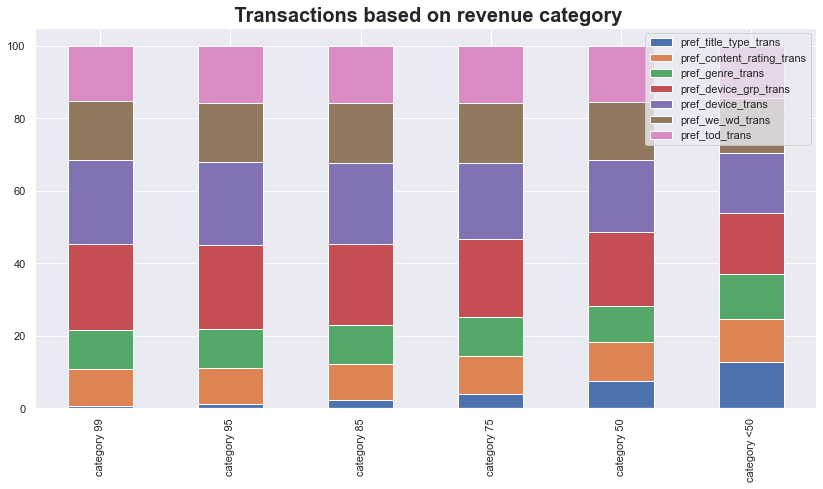

In [72]:
#  stacked plot based on revenue category
df2_2_rev2_percent.plot.bar(stacked = True, grid = True)
plt.title(' Transactions based on revenue category' ,fontweight="bold",size= 20)

In [57]:
df2_2_rev3=df2_2[['preferred_format','pref_title_type_trans','pref_content_rating_trans','pref_genre_trans','pref_device_grp_trans','pref_device_trans','pref_we_wd_trans','pref_tod_trans']].groupby('preferred_format').sum()
df2_2_rev3.index = ['HD','No Preference','SD']
df2_2_rev3_percent = df2_2_rev3.div(df2_2_rev3.sum(axis=1), axis=0) * 100
df2_2_rev3

,pref_title_type_trans,pref_content_rating_trans,pref_genre_trans,pref_device_grp_trans,pref_device_trans,pref_we_wd_trans,pref_tod_trans
HD,32668,64137,66741,125543,122791,98686,93260
No Preference,5325,6223,5413,12422,11898,9404,8688
SD,50076,108296,112795,220025,215940,167525,158996


Text(0.5, 1.0, ' Transactions based on preferred format')

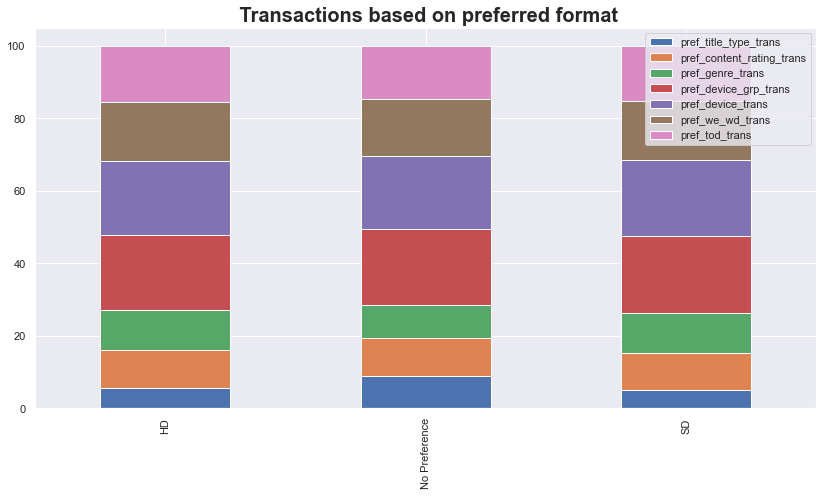

In [58]:
#  stacked plot based on preferred format
df2_2_rev3_percent.plot.bar(stacked = True, grid = True)
plt.title(' Transactions based on preferred format',fontweight="bold",size= 20)

In [59]:
df2_2_rev4=df2_2[['pref_we_wd','pref_title_type_trans','pref_content_rating_trans','pref_genre_trans','pref_device_grp_trans','pref_device_trans','pref_we_wd_trans','pref_tod_trans']].groupby('pref_we_wd').sum()
df2_2_rev4.index = ['No Preference','Weekday','Weekends']
df2_2_rev4_percent = df2_2_rev4.div(df2_2_rev4.sum(axis=1), axis=0) * 100
df2_2_rev4

,pref_title_type_trans,pref_content_rating_trans,pref_genre_trans,pref_device_grp_trans,pref_device_trans,pref_we_wd_trans,pref_tod_trans
No Preference,9490,13351,12775,27988,27266,0,19165
Weekday,20326,45541,48762,91536,89504,70824,65561
Weekends,58253,119764,123412,238466,233859,204791,176218


Text(0.5, 1.0, ' Transactions based on preferred day of week (weekend/weekday) ')

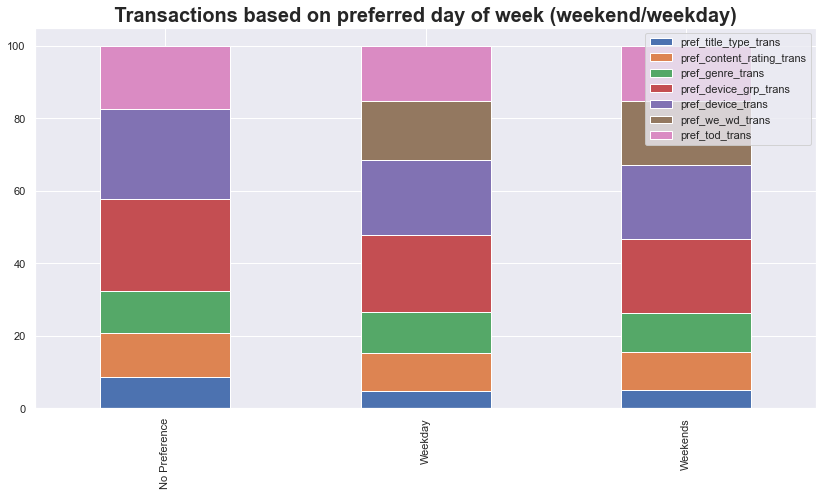

In [60]:
#  stacked plot based on preferred we_wd
df2_2_rev4_percent.plot.bar(stacked = True, grid = True)
plt.title(' Transactions based on preferred day of week (weekend/weekday) ',fontweight="bold",size= 20)

In [61]:
df2_2_rev5=df2_2[['pref_device_grp','pref_title_type_trans','pref_content_rating_trans','pref_genre_trans','pref_device_grp_trans','pref_device_trans','pref_we_wd_trans','pref_tod_trans']].groupby('pref_device_grp').sum()
df2_2_rev5.index = ['csg_unknown','device','mobile','no pref','web']
df2_2_rev5_percent = df2_2_rev5.div(df2_2_rev5.sum(axis=1), axis=0) * 100
df2_2_rev5

,pref_title_type_trans,pref_content_rating_trans,pref_genre_trans,pref_device_grp_trans,pref_device_trans,pref_we_wd_trans,pref_tod_trans
csg_unknown,601,1110,1285,2174,2174,1711,1541
device,51645,115623,118107,243185,238621,179858,172735
mobile,18230,31648,33257,60391,58172,47481,42933
no pref,3392,3726,3378,0,204,5584,4923
web,14201,26549,28922,52240,51458,40981,38812


Text(0.5, 1.0, ' Transactions based on preferred device group ')

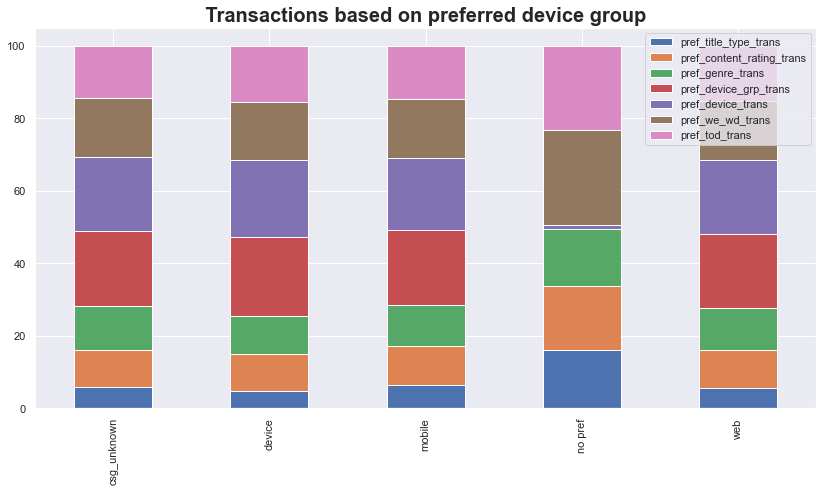

In [62]:
#  stacked plot based on preferred device group
df2_2_rev5_percent.plot.bar(stacked = True,grid = True)
plt.title(' Transactions based on preferred device group ',fontweight="bold",size= 20)

In [63]:
df2_2_rev6=df2_2[['pref_tod','pref_title_type_trans','pref_content_rating_trans','pref_genre_trans','pref_device_grp_trans','pref_device_trans','pref_we_wd_trans','pref_tod_trans']].groupby('pref_tod').sum()
df2_2_rev6.index = ['Afternoon','Evening','Morning','Night','no pref']
df2_2_rev6_percent = df2_2_rev6.div(df2_2_rev6.sum(axis=1), axis=0) * 100
df2_2_rev6

,pref_title_type_trans,pref_content_rating_trans,pref_genre_trans,pref_device_grp_trans,pref_device_trans,pref_we_wd_trans,pref_tod_trans
Afternoon,18419,38796,40675,74957,73393,59922,55929
Evening,51795,112061,116494,228262,223789,173464,188826
Morning,4112,7274,7694,13007,12740,10847,9745
Night,2280,4599,5062,8929,8788,6682,6444
no pref,11463,15926,15024,32835,31919,24700,0


Text(0.5, 1.0, ' Transactions based on preferred time of day ')

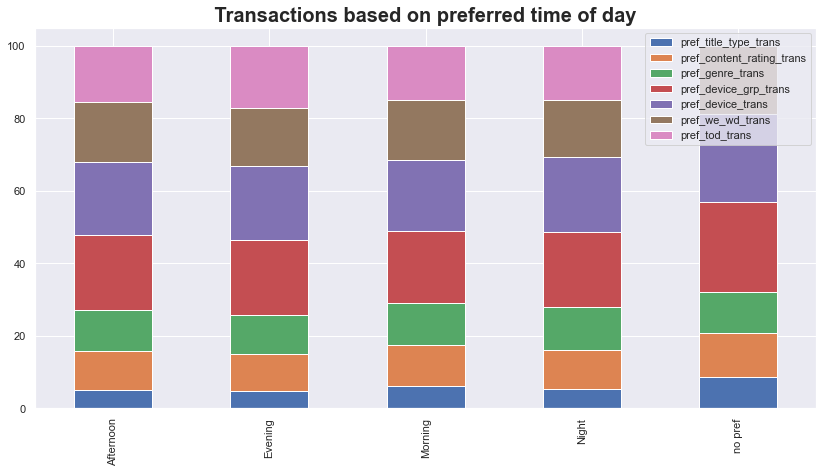

In [64]:
#  stacked plot based on preferred tod
df2_2_rev6_percent.plot.bar(stacked = True, grid = True)
plt.title(' Transactions based on preferred time of day ',fontweight="bold",size= 20)

In [65]:
df2_2_rev7=df2_2[['pref_title_type','pref_title_type_trans','pref_content_rating_trans','pref_genre_trans','pref_device_grp_trans','pref_device_trans','pref_we_wd_trans','pref_tod_trans']].groupby('pref_title_type').sum()
df2_2_rev7.index = ['average','new','no pref','old']
df2_2_rev7_percent = df2_2_rev7.div(df2_2_rev7.sum(axis=1), axis=0) * 100
df2_2_rev7

,pref_title_type_trans,pref_content_rating_trans,pref_genre_trans,pref_device_grp_trans,pref_device_trans,pref_we_wd_trans,pref_tod_trans
average,59907,131719,137080,267274,261733,206576,194940
new,8298,15957,16352,30024,29538,22997,22349
no pref,11221,15397,14295,32461,31670,24060,22624
old,8643,15583,17222,28231,27688,21982,21031


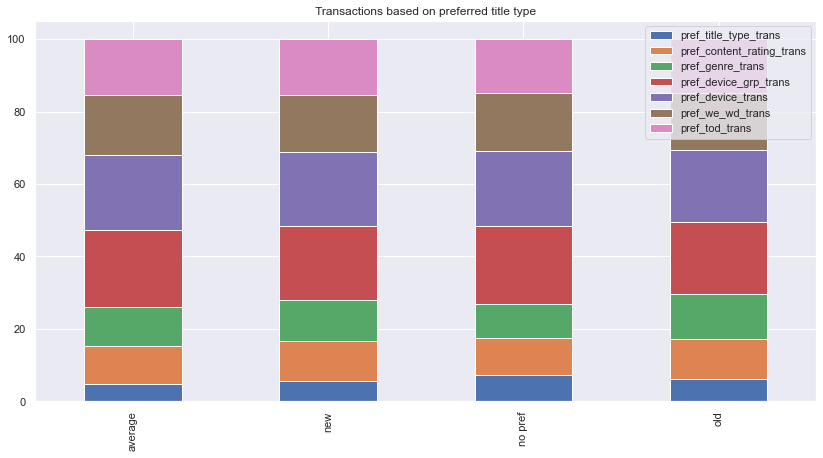

In [66]:
#  stacked plot based on preferred title type
df2_2_rev7_percent.plot.bar(stacked = True, title = ' Transactions based on preferred title type ', grid = True)
#------------drop pref_title_type------------

0.006036560666802027


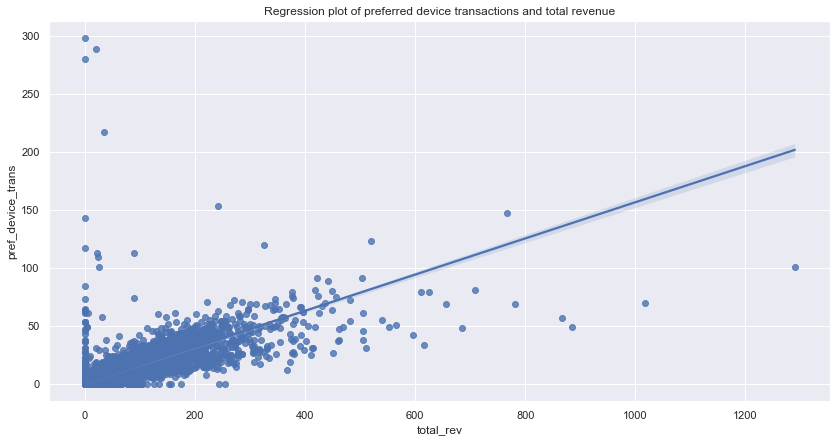

In [67]:
# regression 
df2.head()
sns.regplot(x='total_rev',y='pref_device_trans',data=df2)
plt.title('Regression plot of preferred device transactions and total revenue')
print(r2_score(df2['total_rev'],df2['pref_device_trans']))

0.01440314591898817


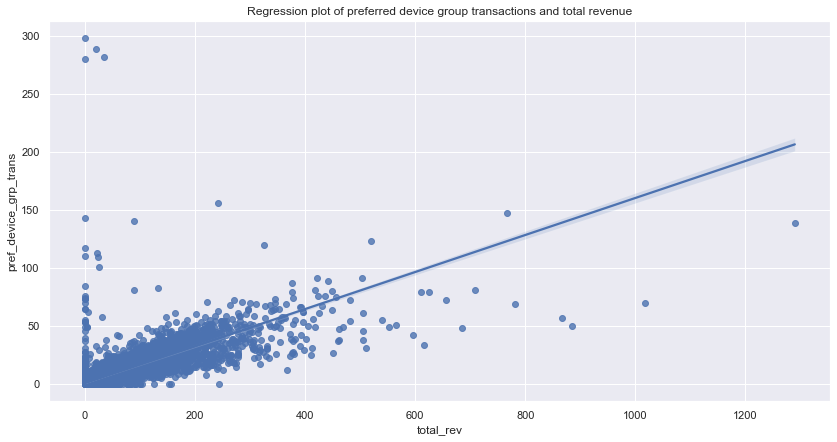

In [68]:
# regression 

sns.regplot(x='total_rev',y='pref_device_grp_trans',data=df2)
plt.title('Regression plot of preferred device group transactions and total revenue')
print(r2_score(df2['total_rev'],df2['pref_device_grp_trans']))